# Random Forest Regression

Random Forest Regression bertindak seperti kumpulan Tree regression. dimana di dalamnya ia memiliki banyak tree regression, dan jika dimasukkan input test/produksi pada random forest, maka tiap tree akan memberikan prediksinya, output dari tiap tree ini kemudian akan dirata-ratakan, hasil rata-rata ini merupakan output dari Random Forest Regression. berikut cara membuat random forest regression : 

1. Tentukan jumlah K data dari dataset sebagai subset dari dataset
2. dari subset-subset yang terbentuk buat model-modelnya dengan regresi tree
3. model-model tersebut akan membentuk random forest tree.
4. Jika terdapat input test/produksi pada random forest tree, maka input tersebut akan didistribusikan ke setiap tree dan tree akan memberikan output prediksinya. output dari tiap tree kemudian akan dirata-ratakan. hasil rata-rata ini menjadi output dari random forest tree

## Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [24]:
dataset = pd.read_csv("Position_Salaries.csv")
#1D
X=dataset.iloc[:,1].values
#ubah 1D ke 2D
X=X.reshape(len(X),1)
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Training the Random Forest Regression model on the whole dataset

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10)

## Predicting a new result

In [26]:
X_pred = np.array([[i+0.5 for i in np.arange(1,9)]])
X_pred = X_pred.reshape(len(X_pred[0]),1)
y_pred = rfr.predict(X_pred)
y_pred = y_pred.reshape(len(y_pred),1)
print(np.concatenate((X_pred,y_pred),1))

[[1.50e+00 5.30e+04]
 [2.50e+00 5.65e+04]
 [3.50e+00 7.20e+04]
 [4.50e+00 8.30e+04]
 [5.50e+00 1.15e+05]
 [6.50e+00 1.61e+05]
 [7.50e+00 2.45e+05]
 [8.50e+00 3.40e+05]]


## Visualising the Random Forest Regression results (higher resolution)

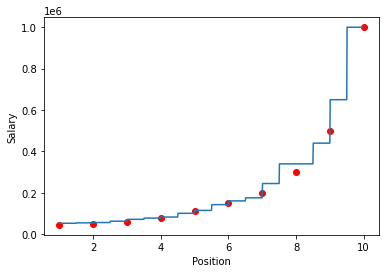

[440000.]


In [28]:
X_smoother = np.array([[i for i in np.arange(min(X),max(X),0.01)]])
X_smoother = X_smoother.reshape(len(X_smoother[0]),1)
plt.xlabel("Position")
plt.ylabel("Salary")
plt.scatter(X,y,color="red")
y_smoother_pred = rfr.predict(X_smoother)
plt.plot(X_smoother,y_smoother_pred)
plt.show()

Disini bisa terlihat bahwa random forest lebih baik dibanding tree. antara x yang satu dengan yang setelahnya terdapat 2 tangga (lebih banyak wilayah pemisah, contoh dari x=9 ke x=10), sehingga jika suatu input lebih dekat ke x setelahnya maka nilainya lebih besar ketimbang x yang lebih dekat dengan nilai sebelumnya. Pada tree yang menjadi wilayah pemisah adalah tengah-tengah antara 2 x, sebagai contoh antara x=9 dan x=10 pemisahnya adalah 9.5. tetapi pada random forest tidak seperti itu. bisa pemisahnya pada data training, bisa antara 2 nilai, dan sebagainya, tergantung pada pengaturan pada saat training